###  Files

In [1]:
import cv2

FILES = ['lena.jpg', 'monarch.png']

for filename in FILES:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite('processed_' + filename, img)

###  URLS

In [2]:
import cv2
import os
from skimage import io

SOURCES = ['lena.jpg',
           'monarch.png',
           'https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg',
           'https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg']

for source in SOURCES:
    img = io.imread(source)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    filename = os.path.basename(source)
    cv2.imwrite('processed_' + filename, img)

###  Logging

In [3]:
import cv2
import os
from skimage import io

SOURCES = ['lena.jpg',
           'monarch.png',
           'https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg',
           'https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg']

for source in SOURCES:
    print('Processing:', source)
    img = io.imread(source)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    filename = os.path.basename(source)
    cv2.imwrite('processed_' + filename, img)

Processing: lena.jpg
Processing: monarch.png
Processing: https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg
Processing: https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg


### Error Handling

In [4]:
import cv2
import os
from skimage import io

SOURCES = ['lena.jpg',
           'monarch.png',
           'https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg',
           'https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg',
           'https://www.somewhere.in/no/mans/land.jpg']

for source in SOURCES:
    print('Processing:', source)
    try:
        img = io.imread(source)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        filename = os.path.basename(source)
        cv2.imwrite('processed_' + filename, img)
    except Exception as e:
        print('Skipping', source, 'because of', e)

Processing: lena.jpg
Processing: monarch.png
Processing: https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg
Processing: https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg
Processing: https://www.somewhere.in/no/mans/land.jpg
Skipping https://www.somewhere.in/no/mans/land.jpg because of <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:720)>


### Thumbnail support

In [5]:
import cv2
import os
from skimage import io

SOURCES = ['lena.jpg',
           'monarch.png',
           'https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg',
           'https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg',
           'https://www.somewhere.in/no/mans/land.jpg']

for source in SOURCES:
    print('Processing:', source)
    try:
        img = io.imread(source)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        filename = os.path.basename(source)
        cv2.imwrite('processed_' + filename, img)
        img = cv2.resize(img, (64, 64))
        cv2.imwrite('thumbnail_' + filename, img)
    except Exception as e:
        print('Skipping', source, 'because of', e)

Processing: lena.jpg
Processing: monarch.png
Processing: https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg
Processing: https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg
Processing: https://www.somewhere.in/no/mans/land.jpg
Skipping https://www.somewhere.in/no/mans/land.jpg because of <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:720)>


### Dominant colors

In [6]:
import cv2
import os
from skimage import io

SOURCES = [
           'lena.jpg',
           'monarch.png',
           'https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg',
           'https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg',
           'https://www.somewhere.in/no/mans/land.jpg'
]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def dominant_colors(img):
    img = cv2.resize(img, (64, 64))
    all_colors = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=8).fit(all_colors)
    palette = kmeans.cluster_centers_.astype(np.uint8)
    
    # sort values from brightest to darkest
    idx = np.argsort(palette.sum(axis=1))[::-1]
    return palette[idx].reshape(-1, 8, 3)

def save_dominant_colors(img, filename):
    palette = dominant_colors(img)
    plt.title(filename)
    plt.imshow(palette)
    plt.savefig('colors_' + filename)

for source in SOURCES:
    print('Processing:', source)
    try:
        img = io.imread(source)
        filename = os.path.basename(source)
        save_dominant_colors(img, filename)
        
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        cv2.imwrite('processed_' + filename, img)
        img = cv2.resize(img, (64, 64))
        cv2.imwrite('thumbnail_' + filename, img)
    except Exception as e:
        print('Skipping', source, 'because of', e)

Processing: lena.jpg
Processing: monarch.png
Processing: https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg
Processing: https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg
Processing: https://www.somewhere.in/no/mans/land.jpg
Skipping https://www.somewhere.in/no/mans/land.jpg because of <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:720)>


### Filtering

In [7]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

Using TensorFlow backend.


In [8]:
def save_tags(filename):
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    tags = [x[1] for x in decode_predictions(preds, top=3)[0]]
    
    with open(filename + '_tags.txt', 'w') as f:
        f.write(','.join(tags))

In [9]:
import cv2
import os
from skimage import io

SOURCES = [
           'lena.jpg',
           'monarch.png',
           'https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg',
           'https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg',
           'https://www.somewhere.in/no/mans/land.jpg'
]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def dominant_colors(img):
    img = cv2.resize(img, (64, 64))
    all_colors = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=8).fit(all_colors)
    palette = kmeans.cluster_centers_.astype(np.uint8)
    
    # sort values from brightest to darkest
    idx = np.argsort(palette.sum(axis=1))[::-1]
    return palette[idx].reshape(-1, 8, 3)

def save_dominant_colors(img, filename):
    palette = dominant_colors(img)
    plt.title(filename)
    plt.imshow(palette)
    plt.savefig('colors_' + filename)

for source in SOURCES:
    print('Processing:', source)
    try:
        img = io.imread(source)
        filename = os.path.basename(source)
        io.imsave(filename, img)
        save_dominant_colors(img, filename)
        save_tags(filename)
        
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        cv2.imwrite('processed_' + filename, img)
        img = cv2.resize(img, (64, 64))
        cv2.imwrite('thumbnail_' + filename, img)
    except Exception as e:
        print('Skipping', source, 'because of', e)

Processing: lena.jpg
Processing: monarch.png
Processing: https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg
Processing: https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg
Processing: https://www.somewhere.in/no/mans/land.jpg
Skipping https://www.somewhere.in/no/mans/land.jpg because of <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:720)>


In [10]:
%timeit save_tags('cat.jpg')

510 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


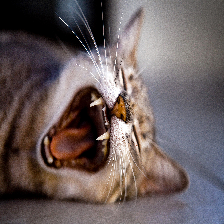

In [11]:
image.load_img('cat.jpg', target_size=(224, 224))

In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.cluster import KMeans
from skimage import io

SOURCES = [
           'lena.jpg',
           'monarch.png',
           'https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg',
           'https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg',
           'https://www.somewhere.in/no/mans/land.jpg' # unreachable
          ]

model = ResNet50(weights='imagenet')

def load_img_keras(filename):
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def get_tags(x):
    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    tags = [x[1] for x in decode_predictions(preds, top=3)[0]]
    return tags

def save_tags(tags, filename):
    with open(filename + '_tags.txt', 'w') as f:
        f.write(','.join(tags))

def get_dominant_colors(img):
    img = cv2.resize(img, (64, 64))
    all_colors = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=8).fit(all_colors)
    palette = kmeans.cluster_centers_.astype(np.uint8)
    
    # sort values from brightest to darkest
    idx = np.argsort(palette.sum(axis=1))[::-1]
    return palette[idx].reshape(-1, 8, 3)

def save_dominant_colors(palette, filename):
    plt.title(filename)
    plt.imshow(palette)
    plt.savefig('colors_' + filename)

for source in SOURCES:
    print('Processing:', source)
    try:
        # Original image
        img = io.imread(source)
        filename = os.path.basename(source)
        io.imsave(filename, img)
        
        # Palette
        palette = get_dominant_colors(img)
        save_dominant_colors(palette, filename)
        
        # Tagging
        img_keras = load_img_keras(filename)
        tags = get_tags(img_keras)
        save_tags(tags, filename)
        
        # Grayscale
        cv2.imwrite('processed_' + filename, cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
        
        # Thubnail
        cv2.imwrite('thumbnail_' + filename, cv2.resize(img, (64, 64)))
    except Exception as e:
        print('Skipping', source, 'because of', e)

Processing: lena.jpg
Processing: monarch.png
Processing: https://github.com/opencv/opencv/raw/master/samples/data/aero3.jpg
Processing: https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg
Processing: https://www.somewhere.in/no/mans/land.jpg
Skipping https://www.somewhere.in/no/mans/land.jpg because of <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:720)>
